In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read DataSet

In [2]:
employee_df=pd.read_excel("Bank_Churn_Messy.xlsx")
employee_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [3]:
employee_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
employee_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78


### Explore Dataset

In [5]:
employee_df.shape

(10001, 8)

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [7]:
employee_df.dtypes


CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
EstimatedSalary     object
dtype: object

### Descriptive Statistics

In [8]:
employee_df.describe()

,CustomerId,CreditScore,Age,Tenure
count,1.000100e+04,10001.000000,9998.000000,10001.000000
mean,1.569093e+07,650.542946,38.920984,5.012699
std,7.193531e+04,96.658818,10.489116,2.892047
min,1.556570e+07,350.000000,18.000000,0.000000
25%,1.562852e+07,584.000000,32.000000,3.000000
50%,1.569073e+07,652.000000,37.000000,5.000000
75%,1.575323e+07,718.000000,44.000000,7.000000
max,1.581569e+07,850.000000,92.000000,10.000000


In [9]:
df=employee_df[["CreditScore","Age","Tenure"]]
df.corr()

,CreditScore,Age,Tenure
CreditScore,1.000000,-0.004163,0.000791
Age,-0.004163,1.000000,-0.010003
Tenure,0.000791,-0.010003,1.000000


In [10]:
employee_df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              5
Gender                 2
Age                   70
Tenure                11
EstimatedSalary     9997
dtype: int64

In [11]:
employee_df["Geography"].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

### Data Cleaning

In [12]:
employee_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [13]:
employee_df.notnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9996,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True
9999,True,True,True,True,True,True,True,True


In [14]:
employee_df["Surname"] = employee_df["Surname"].fillna(value="Unknown")

In [15]:
employee_df=employee_df.dropna()

In [16]:
employee_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [17]:
Country_Mapping = {'FRA': 'France', 'French': 'France'}
employee_df['Geography'] = employee_df['Geography'].replace(Country_Mapping)
employee_df

C:\Users\laptop center\AppData\Local\Temp\ipykernel_12400\29588411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['Geography'] = employee_df['Geography'].replace(Country_Mapping)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,France,Female,42.0,8,€113931.57
3,15701354,Boni,699,France,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,France,Male,35.0,10,€101699.77
9997,15584532,Liu,709,France,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,France,Female,28.0,4,€38190.78


In [18]:
employee_df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
employee_df["Age"]=employee_df["Age"].fillna(employee_df["Age"].median()).astype(int)

C:\Users\laptop center\AppData\Local\Temp\ipykernel_12400\2402123002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df["Age"]=employee_df["Age"].fillna(employee_df["Age"].median()).astype(int)


In [20]:
employee_df['EstimatedSalary']=employee_df['EstimatedSalary'].astype(str)
employee_df['EstimatedSalary']=employee_df['EstimatedSalary'].str.replace(r'[^0-9]','',regex=True)
employee_df['EstimatedSalary']=employee_df['EstimatedSalary'].astype(float)

C:\Users\laptop center\AppData\Local\Temp\ipykernel_12400\3212094438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['EstimatedSalary']=employee_df['EstimatedSalary'].astype(str)
C:\Users\laptop center\AppData\Local\Temp\ipykernel_12400\3212094438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['EstimatedSalary']=employee_df['EstimatedSalary'].str.replace(r'[^0-9]','',regex=True)
C:\Users\laptop center\AppData\Local\Temp\ipykernel_12400\3212094438.py:3: SettingWithCopyWarning

In [21]:
employee_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
EstimatedSalary    float64
dtype: object

In [22]:
df=employee_df[["CreditScore","Age","Tenure","EstimatedSalary"]]
df.corr()

,CreditScore,Age,Tenure,EstimatedSalary
CreditScore,1.000000,-0.004163,0.000606,-0.000843
Age,-0.004163,1.000000,-0.010003,-0.015493
Tenure,0.000606,-0.010003,1.000000,0.005568
EstimatedSalary,-0.000843,-0.015493,0.005568,1.000000


In [23]:
employee_df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,10134888.0
1,15647311,Hill,608,Spain,Female,41,1,11254258.0
2,15619304,Onio,502,France,Female,42,8,11393157.0
3,15701354,Boni,699,France,Female,39,1,9382663.0
4,15737888,Mitchell,850,Spain,Female,43,2,790841.0
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,9627064.0
9996,15569892,Johnstone,516,France,Male,35,10,10169977.0
9997,15584532,Liu,709,France,Female,36,7,4208558.0
9998,15682355,Sabbatini,772,Germany,Male,42,3,9288852.0


In [24]:
import seaborn as sns

<Axes: ylabel='CreditScore'>

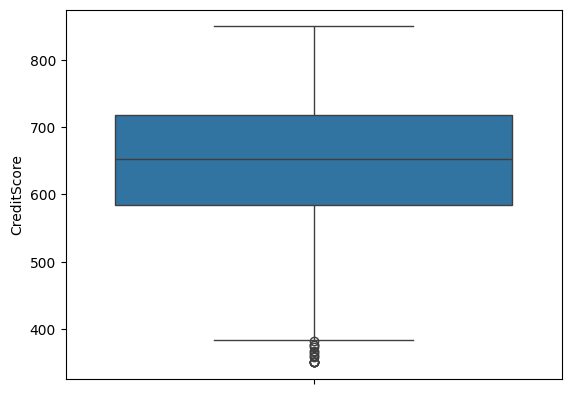

In [25]:
sns.boxplot(data=employee_df['CreditScore'])

<Axes: ylabel='Age'>

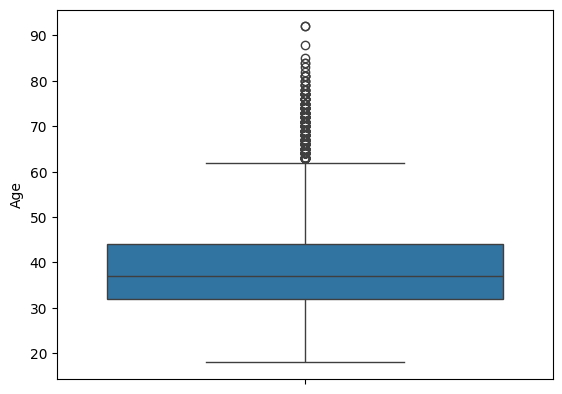

In [26]:
sns.boxplot(data=employee_df['Age'])

<Axes: ylabel='EstimatedSalary'>

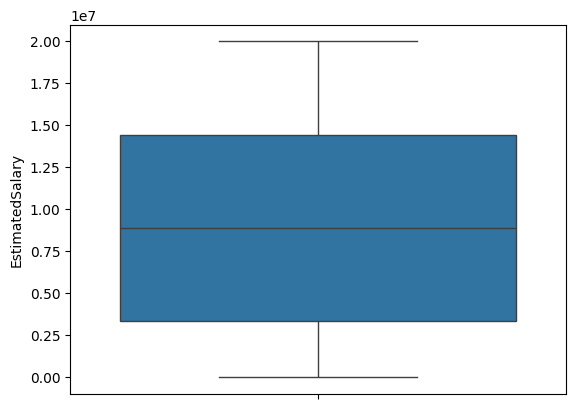

In [27]:
sns.boxplot(data=employee_df['EstimatedSalary'])

In [28]:
Q1=employee_df['Age'].quantile(0.25)
Q3=employee_df['Age'].quantile(0.75)
IQR=Q3-Q1
Upper_Limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
AgeOutliers=employee_df[(employee_df['Age'] > Upper_Limit) | (employee_df['Age'] < Lower_Limit)]
AgeOutliers.count()


CustomerId         359
Surname            359
CreditScore        359
Geography          359
Gender             359
Age                359
Tenure             359
EstimatedSalary    359
dtype: int64

In [29]:
employee_df=employee_df.drop(AgeOutliers.index)
employee_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,10134888.0
1,15647311,Hill,608,Spain,Female,41,1,11254258.0
2,15619304,Onio,502,France,Female,42,8,11393157.0
3,15701354,Boni,699,France,Female,39,1,9382663.0
4,15737888,Mitchell,850,Spain,Female,43,2,790841.0
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,France,Male,35,10,10169977.0
9997,15584532,Liu,709,France,Female,36,7,4208558.0
9998,15682355,Sabbatini,772,Germany,Male,42,3,9288852.0
9999,15628319,Walker,792,France,Female,28,4,3819078.0


In [30]:
Q1=employee_df['CreditScore'].quantile(0.25)
Q3=employee_df['CreditScore'].quantile(0.75)
IQR=Q3-Q1
Upper_Limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
CreditOutliers=employee_df[(employee_df['CreditScore'] > Upper_Limit) | (employee_df['CreditScore'] < Lower_Limit)]
AgeOutliers.count()

CustomerId         359
Surname            359
CreditScore        359
Geography          359
Gender             359
Age                359
Tenure             359
EstimatedSalary    359
dtype: int64

In [31]:

employee_df = employee_df.drop(CreditOutliers.index)

In [32]:
employee_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,10134888.0
1,15647311,Hill,608,Spain,Female,41,1,11254258.0
2,15619304,Onio,502,France,Female,42,8,11393157.0
3,15701354,Boni,699,France,Female,39,1,9382663.0
4,15737888,Mitchell,850,Spain,Female,43,2,790841.0
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,France,Male,35,10,10169977.0
9997,15584532,Liu,709,France,Female,36,7,4208558.0
9998,15682355,Sabbatini,772,Germany,Male,42,3,9288852.0
9999,15628319,Walker,792,France,Female,28,4,3819078.0


In [33]:
Q1=employee_df['EstimatedSalary'].quantile(0.25)
Q3=employee_df['EstimatedSalary'].quantile(0.75)
IQR=Q3-Q1
Upper_Limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
AgeOutliers=employee_df[(employee_df['EstimatedSalary'] > Upper_Limit) | (employee_df['EstimatedSalary'] < Lower_Limit)]
AgeOutliers.count()


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
dtype: int64

In [34]:
filter_df=employee_df[(employee_df["CreditScore"] >820 )& (employee_df["Geography"] =="Spain")]
filter_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
4,15737888,Mitchell,850,Spain,Female,43,2,790841.0
180,15716334,Rozier,850,Spain,Female,45,2,194825.0
200,15604482,Chiemezie,850,Spain,Male,30,2,59782.0
356,15611759,Simmons,850,Spain,Female,57,8,13229849.0
466,15663252,Olisanugo,850,Spain,Female,32,9,1892492.0
...,...,...,...,...,...,...,...,...
9487,15672574,Uspenskaya,850,Spain,Female,32,5,383059.0
9535,15581551,Yobachukwu,850,Spain,Male,41,8,17534728.0
9650,15646168,Ifeatu,834,Spain,Male,33,5,6628518.0
9654,15773098,Ch'in,834,Spain,Male,34,5,534371.0


### Data Visualization


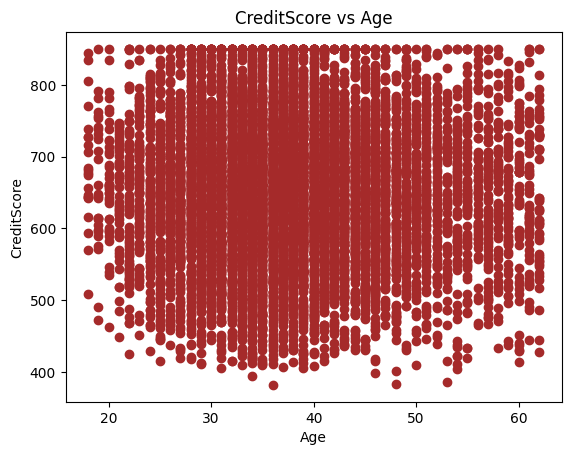

In [35]:
y=employee_df['CreditScore']
x=employee_df['Age']
plt.xlabel('Age' )
plt.ylabel('CreditScore' )
plt.title('CreditScore vs Age')
plt.scatter(x,y,color='Brown' )

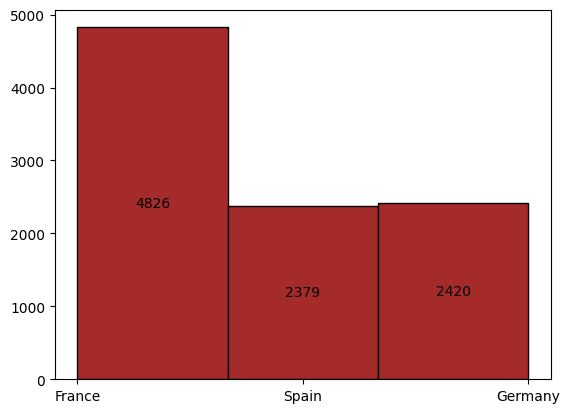

In [36]:
data=employee_df['Geography']
counts,bins,patches=plt.hist(data,bins=3,color='Brown',edgecolor='Black')
plt.bar_label(patches,labels=[f'{int(c)}' for c in counts ], label_type='center')
plt.show()

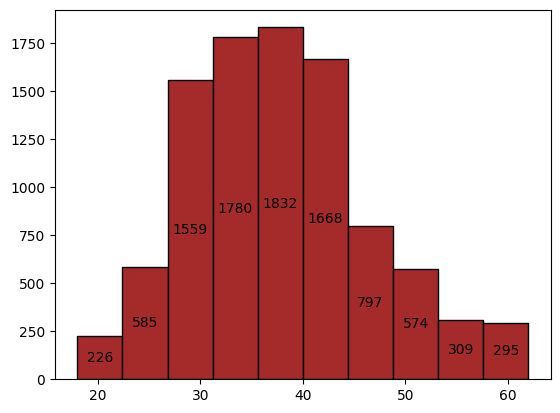

In [37]:
data=employee_df['Age']
counts,bins,patches=plt.hist(data,bins=10,color='Brown',edgecolor='Black')
plt.bar_label(patches,labels=[f'{int(c)}' for c in counts ], label_type='center')
plt.show()